In [33]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploaration

In [84]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


In [35]:
df.shape

(1460, 81)

In [85]:
df_test.shape

(1459, 80)

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [83]:
# Displaying the count of null values if exisits in descending order

series = df.isnull().sum().sort_values(ascending=False)
for index, value in series.items() :
    if value > (df.shape[0] > 0) :
        print(str(index)+" : "+str(value))

PoolQC : 1453
MiscFeature : 1406
Alley : 1369
Fence : 1179
FireplaceQu : 690
LotFrontage : 259
GarageCond : 81
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
BsmtExposure : 38
BsmtFinType2 : 38
BsmtFinType1 : 37
BsmtCond : 37
BsmtQual : 37
MasVnrArea : 8
MasVnrType : 8


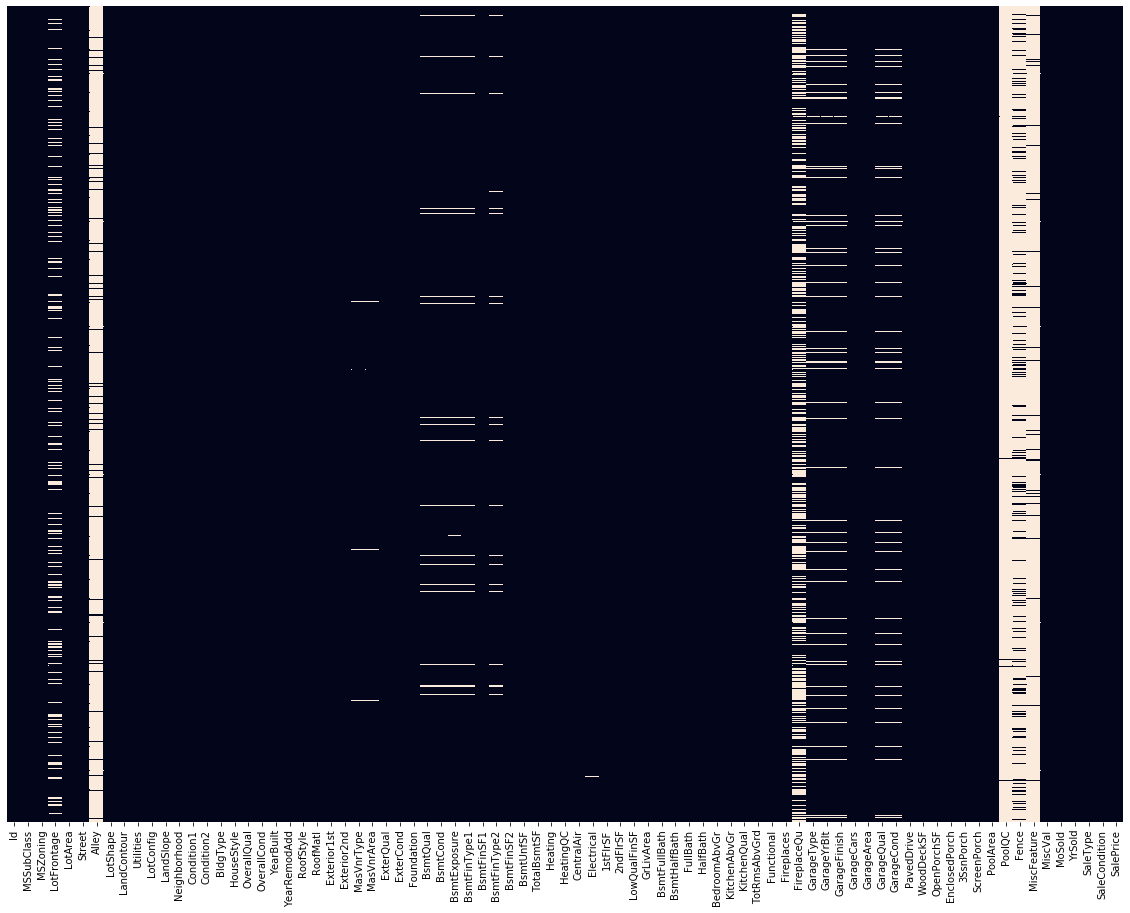

In [40]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [41]:
corr = df.corr()

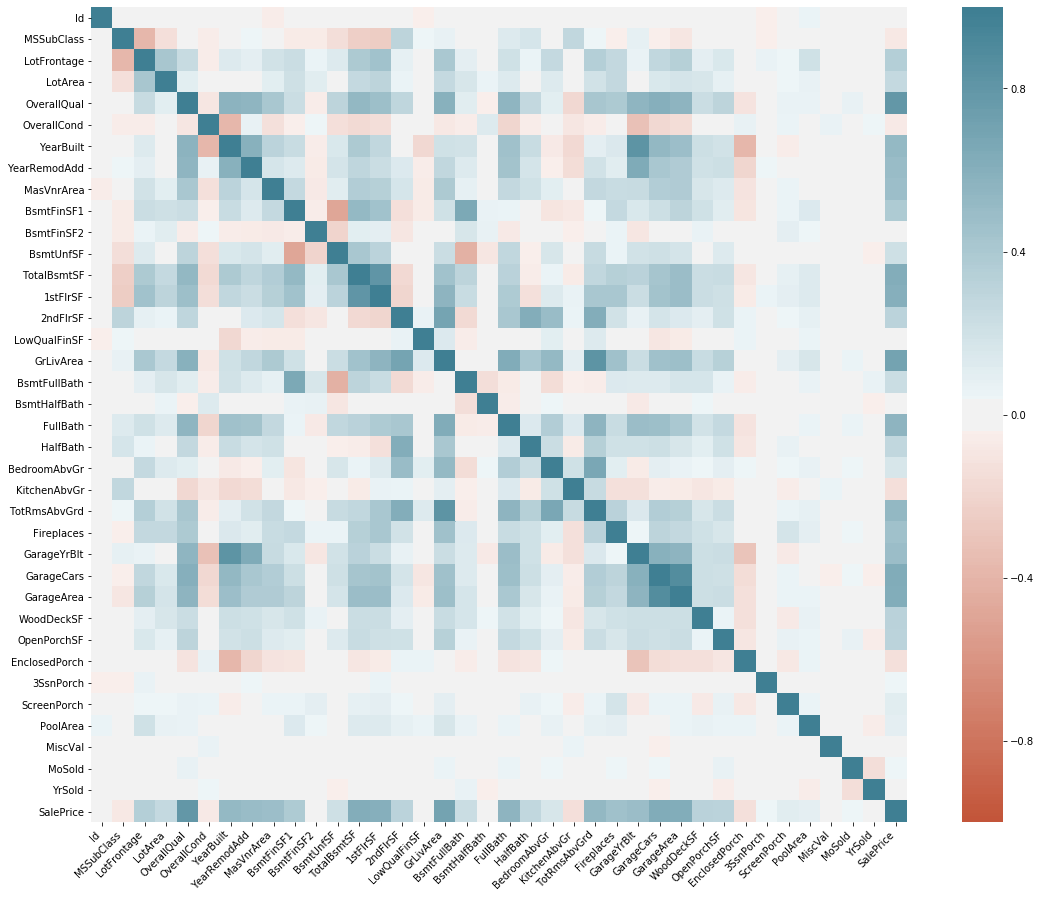

In [42]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

[10, 14, 0, 180]

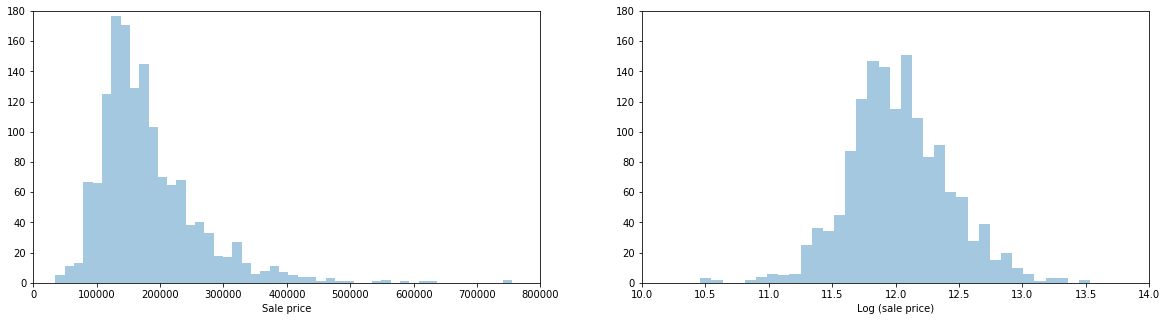

In [45]:
# Set up the matplotlib figure
plt.figure(figsize=(20,5))
#f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(df['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(df['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])


- Positively Skewed so followed the Logrithmaic Transformation. Then we get a normally distrubuted curve

In [44]:
# Correlation with the price of the House
# Without Taking the ID
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

- First five features are the most positively correlated with the SalePrice. We can not see good correlation between the rest of the features with the SalePrice

## Data Representation

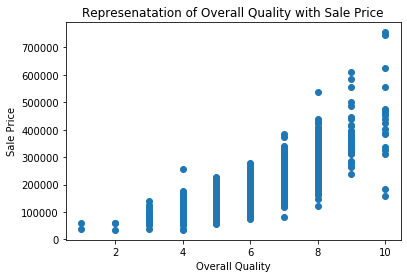

In [59]:
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Represenatation of Overall Quality with Sale Price')
plt.show()

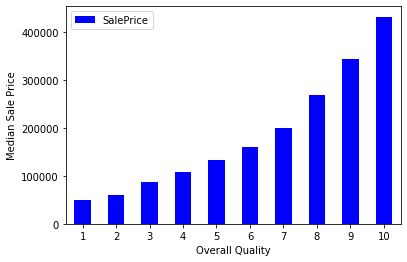

In [50]:
df.OverallQual.unique()
quality_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

- As the Overall Quality increases, the sale price also increases

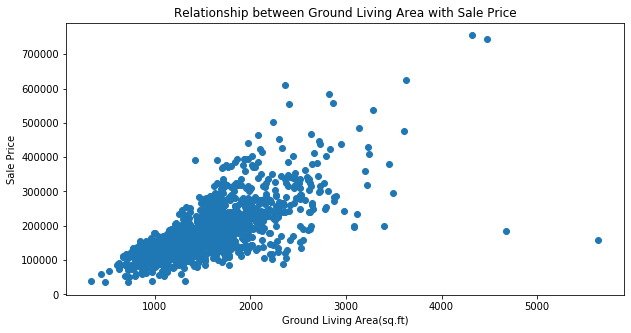

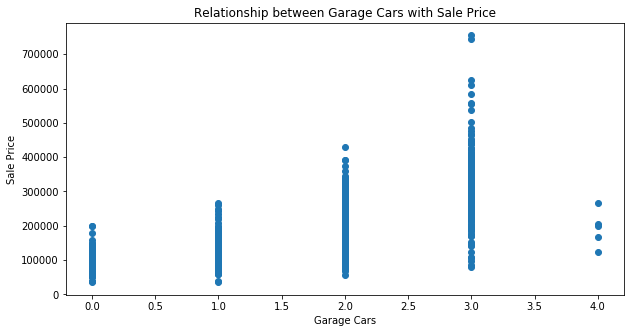

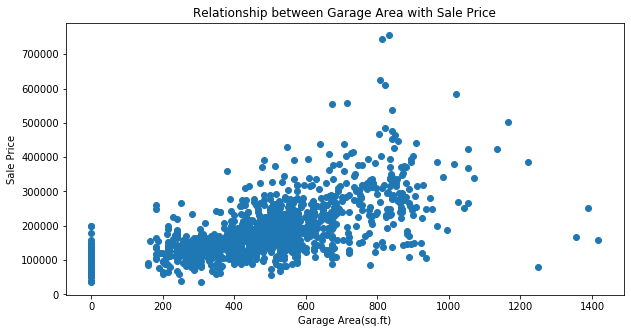

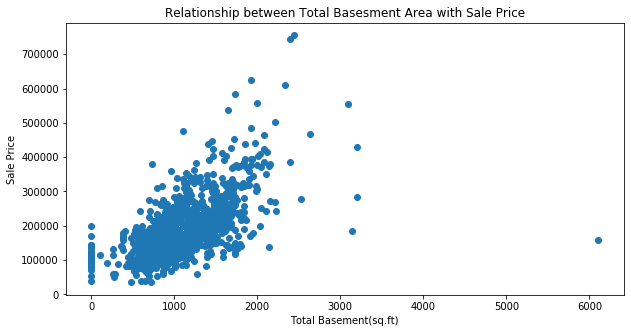

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Ground Living Area(sq.ft)')
plt.title('Relationship between Ground Living Area with Sale Price')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageCars'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Cars')
plt.title('Relationship between Garage Cars with Sale Price')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area(sq.ft)')
plt.title('Relationship between Garage Area with Sale Price')
plt.show()

  
plt.figure(figsize=(10,5))
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Total Basement(sq.ft)')
plt.title('Relationship between Total Basesment Area with Sale Price')
plt.show()

- As the size of the Living Area increases corresponding price also increases
- Garage Cars contains discrete values, by observing the chart as the number of garage cars increases the Sale Price also inreases
- There are many homes with no garage areas, as the size of the garagae area increases corresponding sale price also increases
- There are houses with no basements, as the Total area of the basement increases Sale Price also increases

In [13]:
categorical = [column for column in df.columns if df[column].dtype == object]
print('Number of Categorical columns',len(categorical))
categorical

Number of Categorical columns 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
numerical = [column for column in df.columns if df[column].dtype != object]
print('Number of Numerical Column',len(numerical))
numerical

Number of Numerical Column 38


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [88]:
numerical=df.select_dtypes(exclude=[np.number])
numerical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
numericalFeatures = df[numerical]
numericalFeatures.head()

In [19]:
def draw_histogram(values,label):
    sns.distplot(values)
    plt.xlabel('value')
    plt.ylabel('Density')
    plt.title(f'Histogram for {label}')
    

ValueError: cannot convert float NaN to integer

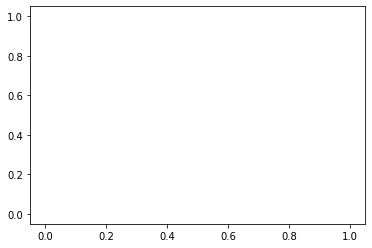

In [47]:
# df['GarageYrBltInt'] = df['GarageYrBlt']
# df['GarageYrBlt'].astype(int)
draw_histogram(df['GarageYrBlt'],'asdas')

## Feature Engineering

In [ ]:
# Dropping columns with missing values

df.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1,inplace=True)

